# Project Overview

---
---

The Garment Industry is one of the key examples of the industrial globalization of this modern era. The Garment Industry consists of a highly labor-intensive industry with plenty of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. Decision makers in the garments industry require the capability to track, analyse, and predict the productivity performance of the working teams in their factories.

---
Addtionally, productivity performance monitoring provides insights into the factors that influence productivity in the garment industry. By understanding these relationships, decision-makers can implement strategies to improve productivity, such as optimizing worker schedules, providing incentives, or adjusting targeted productivity goals. Additionally, predicting future productivity can help the management plan resources and set realistic expectations for performance.

---
---

# Import Libraries
---
---
Import required Python libraries (e.g., NumPy, pandas, scikit-learn, etc.). Establishes and prepares the Python environment for data analysis, visualization, and machine learning by importing necessary libraries and modules. It prepares for tasks like data acquisition, preprocessing, model training, and evaluation.

---
--- 

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import wrangle
import acquire
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

In [21]:
# Visualizing
%matplotlib inline

# Apply darkgrid style in Seaborn
sns.set_style("darkgrid")

# Apply dark_background style in Matplotlib
plt.style.use('dark_background')

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', None)

pd.reset_option("colheader_justify", 'left')

In [22]:
data_dict = {
    "Module": [
        "pandas",
        "numpy",
        "seaborn",
        "wrangle",
        "acquire",
        "sklearn.model_selection.TimeSeriesSplit",
        "sklearn.metrics.mean_squared_error",
        "matplotlib.pyplot",
        "statsmodels.tsa.holtwinters.Holt",
        "statsmodels.tsa.seasonal.seasonal_decompose",
        "sklearn.model_selection.train_test_split",
        "sklearn.linear_model.LinearRegression",
        "sklearn.ensemble.RandomForestRegressor",
    ],
    "Description": [
        "Pandas is a popular library for handling and analyzing data in a table format. It is often used for data manipulation tasks, like filtering, sorting, or aggregating data. The pd alias is used as a shorthand to refer to Pandas functions in the rest of the code.",
        "Numpy is another popular library for working with arrays and numerical data. It provides functions for mathematical operations, like addition, multiplication, or statistical calculations. The np alias is used as a shorthand.",
        "Seaborn is a data visualization library built on top of Matplotlib (another visualization library). It simplifies the process of creating complex and informative graphs, making them visually appealing. The sns alias is used as a shorthand.",
        "This imports a custom module named wrangle, which likely contains functions for data preprocessing, like cleaning or transforming the data.",
        "This imports a custom module named acquire, which probably contains functions to obtain data from external sources, like databases or APIs.",
        "Scikit-learn is a widely used machine learning library, and this line imports the TimeSeriesSplit function, which is used to split time series data into training and testing sets for model validation.",
        "This imports the mean_squared_error function from Scikit-learn, which is a metric used to evaluate the performance of regression models by calculating the average squared difference between the true and predicted values.",
        "Matplotlib is a widely used data visualization library in Python. This line imports its pyplot submodule and assigns it the alias plt for easier reference.",
        "Statsmodels is a library for statistical modeling in Python. This line imports the Holt function, which is an implementation of the Holt-Winters forecasting method for time series data.",
        "This line imports the seasonal_decompose function from Statsmodels, which is used to analyze and visualize the trend, seasonality, and residual components of a time series.",
        "This imports the train_test_split function from Scikit-learn, which is used to randomly split a dataset into training and testing sets.",
        "This line imports the LinearRegression and LogisticRegression classes from Scikit-learn, which are used to create and fit linear and logistic regression models, respectively.",
        "This imports the RandomForestRegressor class from Scikit-learn, which is an ensemble method used for regression tasks, combining multiple decision trees to create a more accurate model.",

    ],
}

# Convert the dictionary to a DataFram
data_dict_df = pd.DataFrame(data_dict)

In [23]:
# Display to the dataframe
data_dict_df

,Module,Description
0,pandas,"Pandas is a popular library for handling and analyzing data in a table format. It is often used for data manipulation tasks, like filtering, sorting, or aggregating data. The pd alias is used as a shorthand to refer to Pandas functions in the rest of the code."
1,numpy,"Numpy is another popular library for working with arrays and numerical data. It provides functions for mathematical operations, like addition, multiplication, or statistical calculations. The np alias is used as a shorthand."
2,seaborn,"Seaborn is a data visualization library built on top of Matplotlib (another visualization library). It simplifies the process of creating complex and informative graphs, making them visually appealing. The sns alias is used as a shorthand."
3,wrangle,"This imports a custom module named wrangle, which likely contains functions for data preprocessing, like cleaning or transforming the data."
4,acquire,"This imports a custom module named acquire, which probably contains functions to obtain data from external sources, like databases or APIs."
5,sklearn.model_selection.TimeSeriesSplit,"Scikit-learn is a widely used machine learning library, and this line imports the TimeSeriesSplit function, which is used to split time series data into training and testing sets for model validation."
6,sklearn.metrics.mean_squared_error,"This imports the mean_squared_error function from Scikit-learn, which is a metric used to evaluate the performance of regression models by calculating the average squared difference between the true and predicted values."
7,matplotlib.pyplot,Matplotlib is a widely used data visualization library in Python. This line imports its pyplot submodule and assigns it the alias plt for easier reference.
8,statsmodels.tsa.holtwinters.Holt,"Statsmodels is a library for statistical modeling in Python. This line imports the Holt function, which is an implementation of the Holt-Winters forecasting method for time series data."
9,statsmodels.tsa.seasonal.seasonal_decompose,"This line imports the seasonal_decompose function from Statsmodels, which is used to analyze and visualize the trend, seasonality, and residual components of a time series."


---
---

# Import Data Dictionary

---
---
This code is creating a simple table that shows a list of software tools (modules) and their descriptions. It does this using a data structure called a data dictionary, which can be thought of as a container that stores related information in pairs.

In this case, the data dictionary has two parts: "Module" and "Description". Each part has a list of values. The "Module" part contains the names of various software tools, while the "Description" part contains a brief explanation of what each tool does.

Here's a simple analogy for non-technical audiences: Imagine you have a recipe book, and you want to create a table of contents. The table of contents will have two columns - one for the name of the recipe (like "chocolate cake") and another for a short description of the recipe (like "a delicious cake made with cocoa and sugar"). The data dictionary in this code is just like that table of contents.

The code then uses a popular tool called "pandas" to convert this data dictionary into a table format, which is called a DataFrame. This makes it easier to read and work with the information.

Finally, the code prints the table (DataFrame) so that you can see the list of software tools and their descriptions.

---
---

In [ ]:
df

# Load and Explore Data
---
- Load the dataset.
- Perform exploratory data analysis (EDA) to understand the data distribution, missing values, and outliers.
- Include visualizations (e.g., histograms, scatter plots, box plots) to better understand the data.
---

In [6]:
# Load the data (assuming it is in a CSV file named 'data.csv')
df = pd.read_csv('employee_productivity.csv')

In [7]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51


In [8]:
# Find and replace "sweing" with "sewing"
df['department'] = df['department'].replace('sweing', 'sewing')

In [9]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51



Column: date

Column: quarter

Column: department

Column: day

Column: team


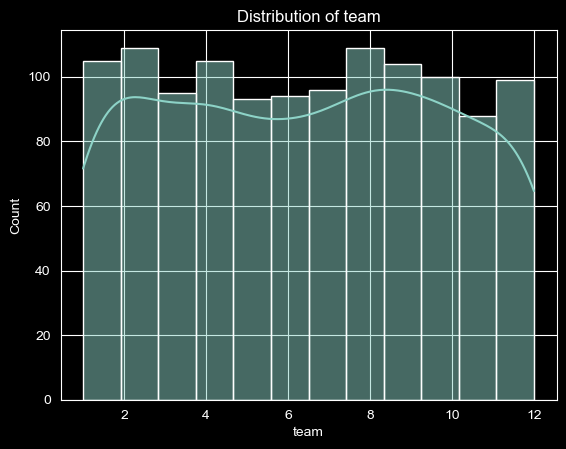


Column: targeted_productivity


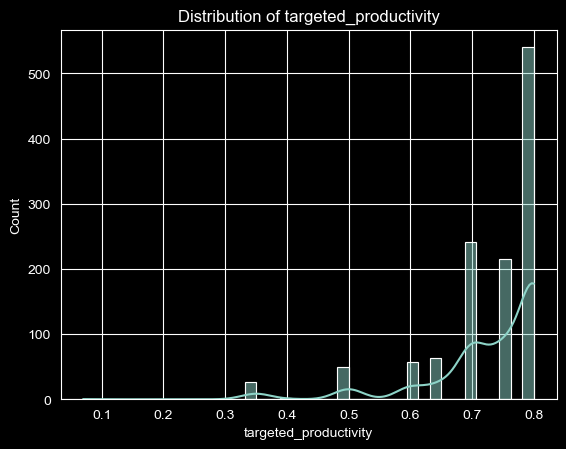


Column: smv


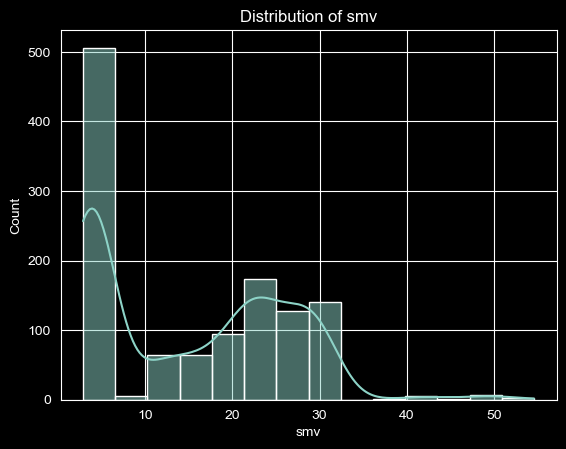


Column: wip


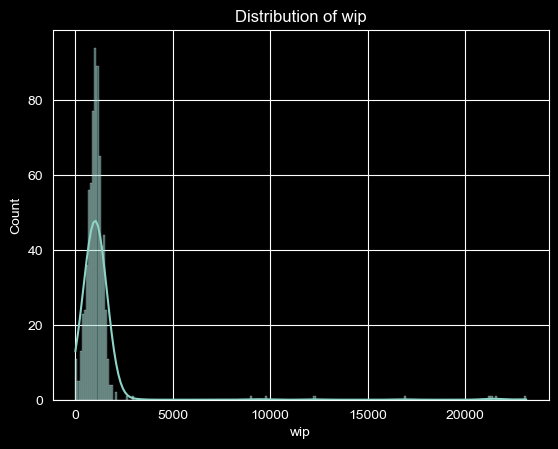


Column: over_time


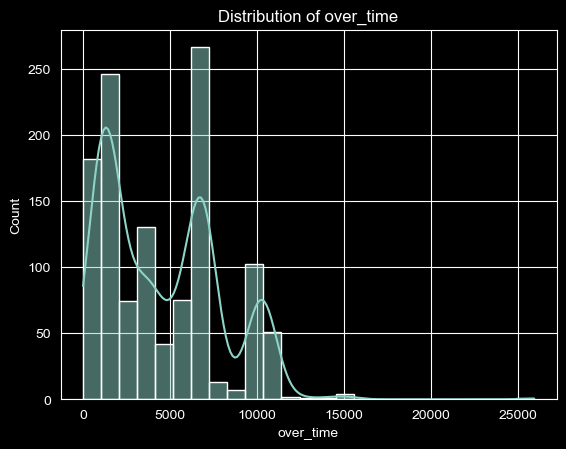


Column: incentive


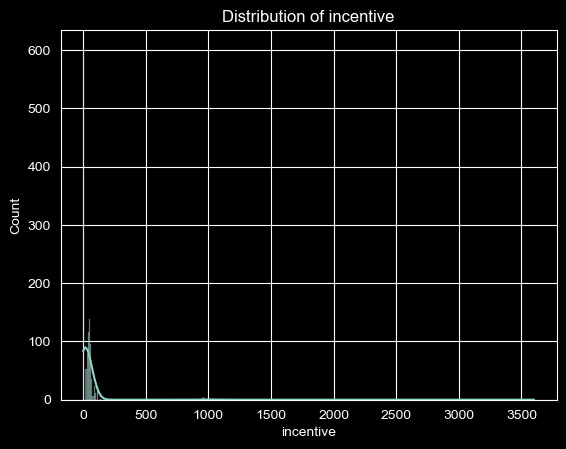


Column: idle_time


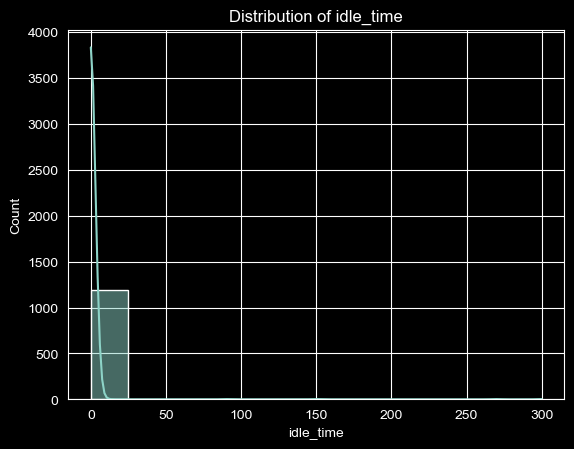


Column: idle_men


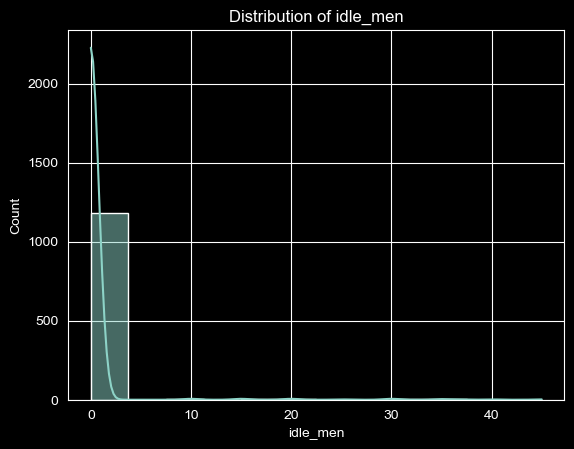


Column: no_of_style_change


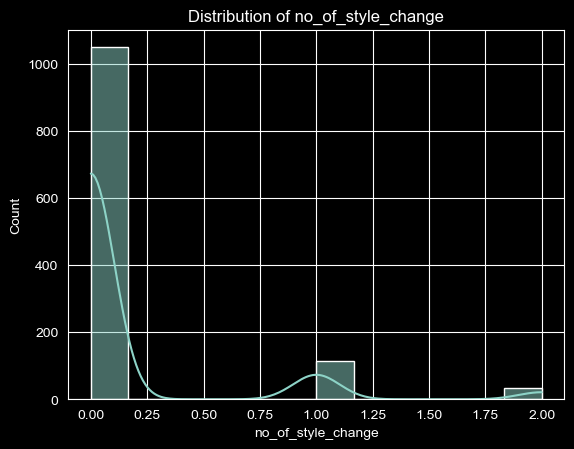


Column: no_of_workers


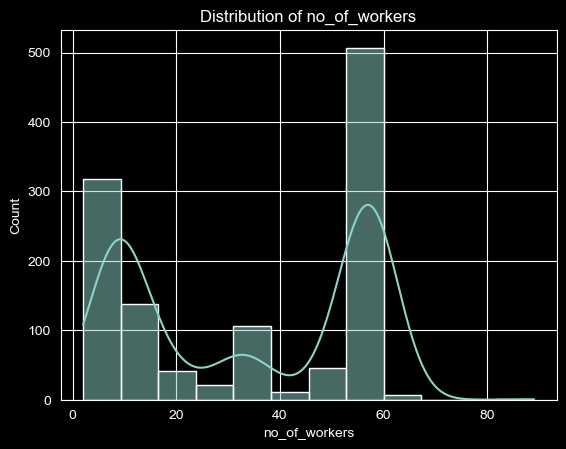


Column: actual_productivity


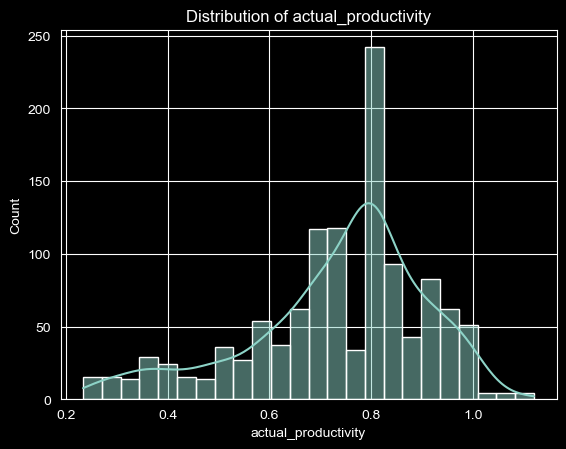

,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,...,unique,top,freq,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
date,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,59,3/11/2015,24,object,None,NaN,None,None,NaN,categorical
quarter,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,5,Quarter1,360,object,None,NaN,None,None,NaN,nominal
department,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,3,sewing,691,object,None,NaN,None,None,NaN,nominal
day,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,6,Wednesday,208,object,None,NaN,None,None,NaN,nominal
team,0.00,0.00,"1,197.00",0,0.00,6.43,3.46,1.00,3.00,6.00,...,NaN,NaN,NaN,int64,Non-normal,0.01,Right,Discrete,0.00,numerical
targeted_productivity,0.00,0.00,"1,197.00",0,0.00,0.73,0.10,0.07,0.70,0.75,...,NaN,NaN,NaN,float64,Non-normal,-2.14,Left,Discrete,79.00,ordinal
smv,0.00,0.00,"1,197.00",0,0.00,15.06,10.94,2.90,3.94,15.26,...,NaN,NaN,NaN,float64,Non-normal,0.41,Right,Continuous,0.00,numerical
wip,506.00,42.27,691.00,506,42.27,"1,190.47","1,837.46",7.00,774.50,"1,039.00",...,NaN,NaN,NaN,float64,Non-normal,9.72,Right,Continuous,22.00,numerical
over_time,0.00,0.00,"1,197.00",0,0.00,"4,567.46","3,348.82",0.00,"1,440.00","3,960.00",...,NaN,NaN,NaN,int64,Non-normal,0.67,Right,Continuous,1.00,numerical
incentive,0.00,0.00,"1,197.00",0,0.00,38.21,160.18,0.00,0.00,0.00,...,NaN,NaN,NaN,int64,Non-normal,15.77,Right,Discrete,11.00,numerical


In [10]:
wrangle.custom_describe(df)

In [11]:
# Investigate relationships between variables using correlation and scatter plots
corr = df.corr()

In [12]:
corr

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.00,0.03,-0.11,-0.03,-0.10,-0.01,0.00,0.03,-0.01,-0.08,-0.15
targeted_productivity,0.03,1.00,-0.07,0.06,-0.09,0.03,-0.06,-0.05,-0.21,-0.08,0.42
smv,-0.11,-0.07,1.00,-0.04,0.67,0.03,0.06,0.11,0.32,0.91,-0.12
wip,-0.03,0.06,-0.04,1.00,0.02,0.17,-0.03,-0.05,-0.07,0.03,0.13
over_time,-0.10,-0.09,0.67,0.02,1.00,-0.00,0.03,-0.02,0.06,0.73,-0.05
incentive,-0.01,0.03,0.03,0.17,-0.00,1.00,-0.01,-0.02,-0.03,0.05,0.08
idle_time,0.00,-0.06,0.06,-0.03,0.03,-0.01,1.00,0.56,-0.01,0.06,-0.08
idle_men,0.03,-0.05,0.11,-0.05,-0.02,-0.02,0.56,1.00,0.13,0.11,-0.18
no_of_style_change,-0.01,-0.21,0.32,-0.07,0.06,-0.03,-0.01,0.13,1.00,0.33,-0.21
no_of_workers,-0.08,-0.08,0.91,0.03,0.73,0.05,0.06,0.11,0.33,1.00,-0.06


# Data Preprocessing
---
## Handling Missing Values
---
- Describe the approach for handling missing values (e.g., dropping, imputing).
- Provide a rationale for the chosen approach.
- Apply the chosen approach to the dataset.
---

This code helps to fix a common issue when working with tables of data: sometimes, there are missing or incomplete values in the table. To handle these missing values, the code uses two different approaches depending on the type of data in each column.

First, the code identifies two groups of columns in the data table (called 'df'):

Columns with numerical data (like numbers or amounts) are called 'numerical_columns'.
Columns with categorical data (like categories or labels) are called 'categorical_columns'.
To fix missing values in numerical columns, the code uses a technique called "interpolation." Interpolation is like filling in the gaps between known values by estimating what the missing values could be, based on the surrounding known values. Imagine you have a series of measurements like "1, 2, ?, 4, 5", and the "?" represents a missing value. Interpolation would fill in the missing value with an estimate, like "3", based on the surrounding numbers.

For categorical columns, the code fills in missing values with the most common value (or the "mode") in each column. For example, if you have a column representing colors and the most common color is "blue", any missing values in that column would be replaced with "blue".

After applying these techniques, the data table (DataFrame) 'df' will have all its missing values filled in with appropriate estimates, making it more suitable for further analysis.

---
---

In [13]:
# Handle missing values (using interpolation for continuous variables and mode for categorical ones)
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

df[numerical_columns] = df[numerical_columns].interpolate()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

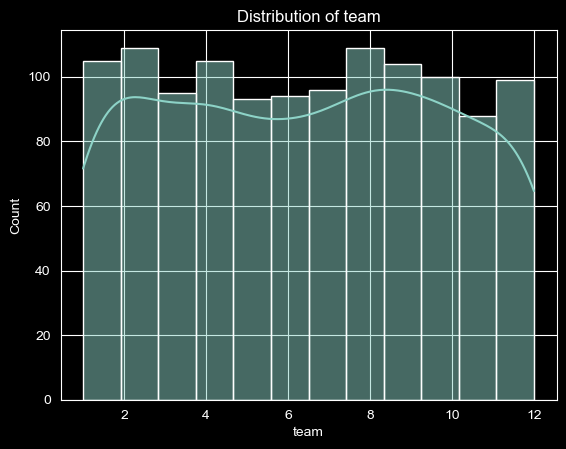

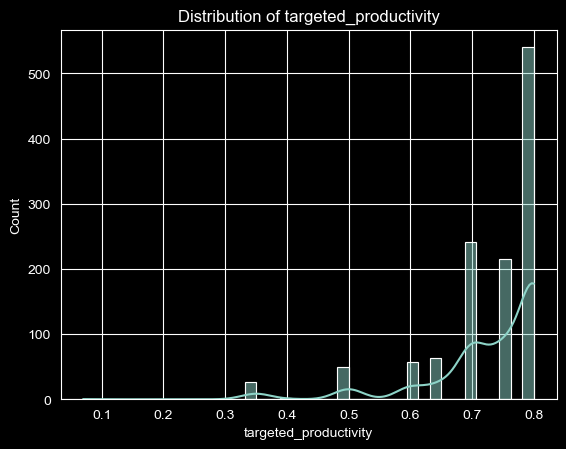

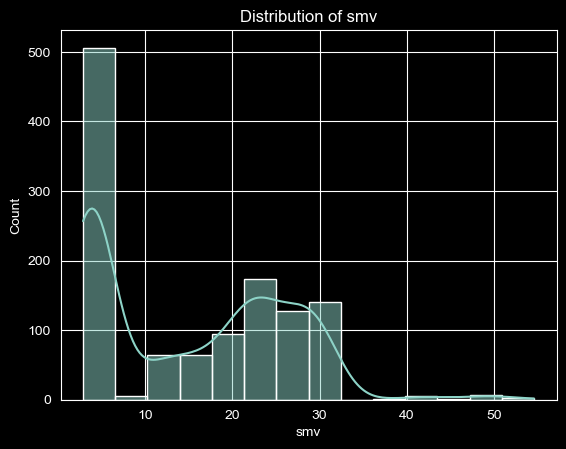

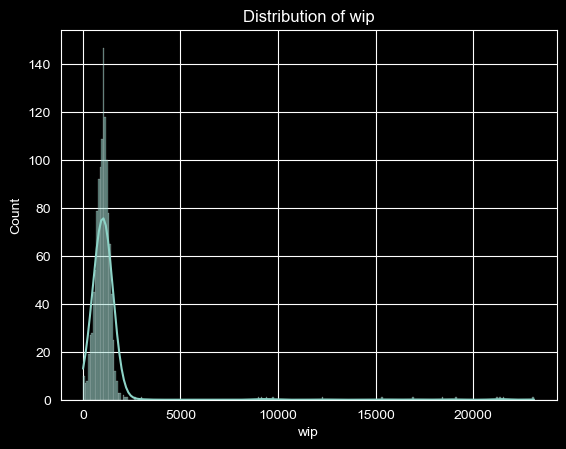

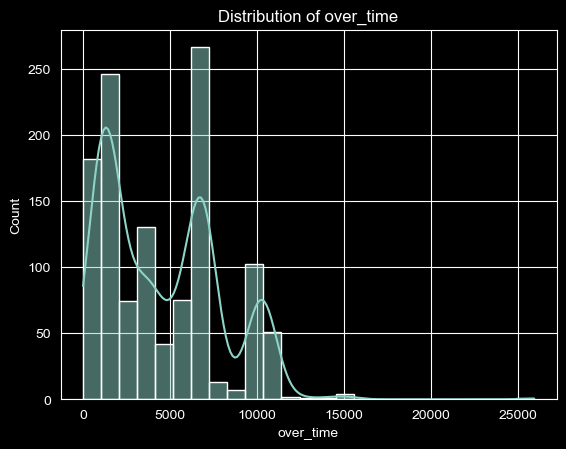

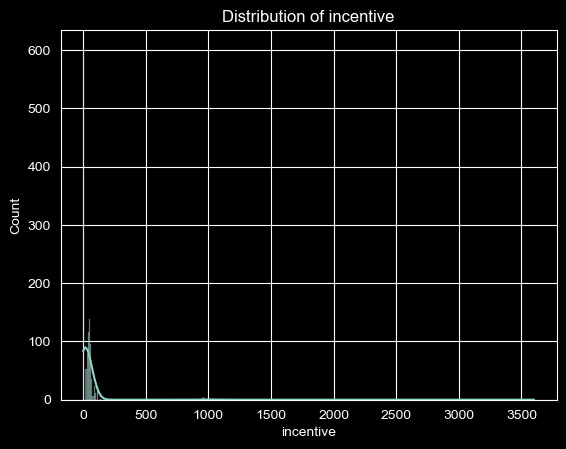

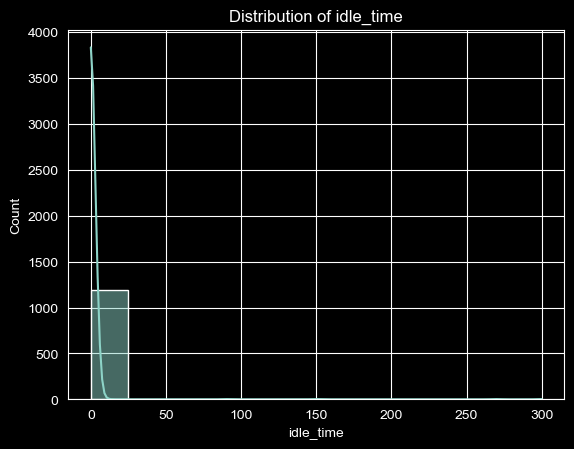

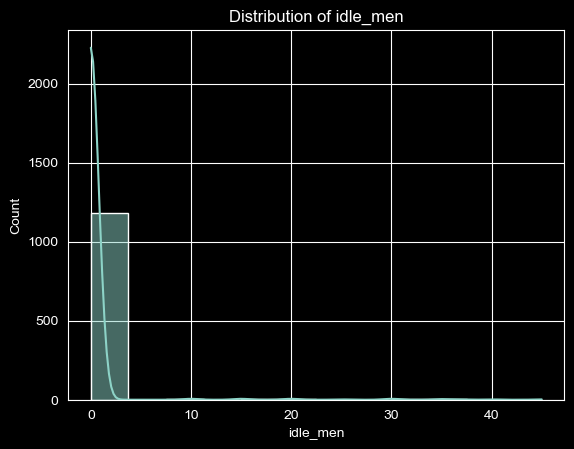

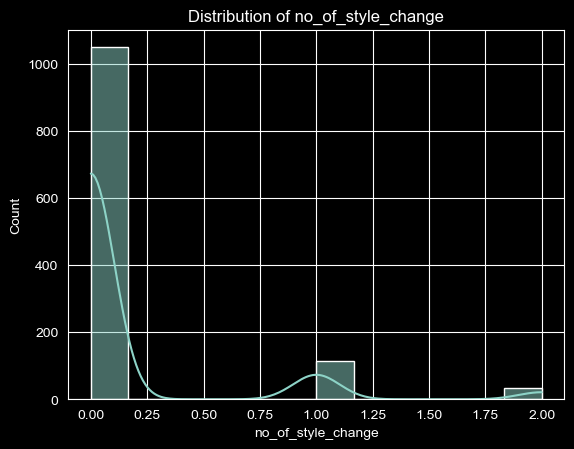

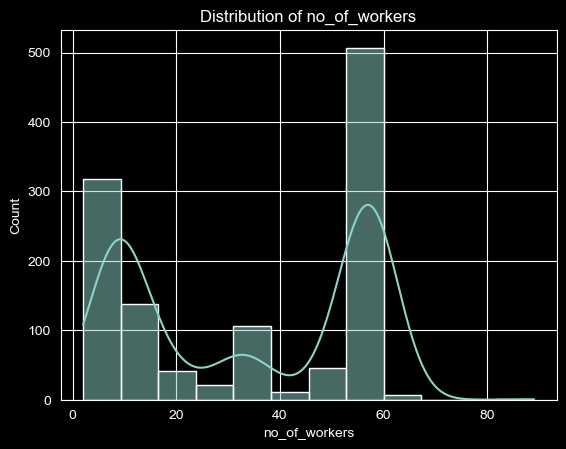

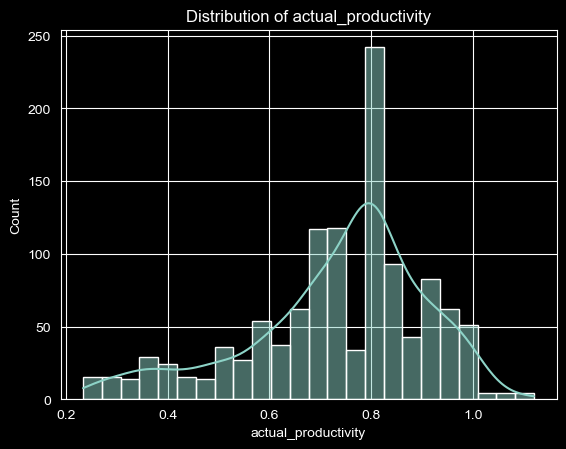

In [14]:
# Visualize the distributions of continuous variables
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

---
## Encoding Categorical Variables
---
- Identify categorical variables in the dataset.
- Describe the chosen encoding technique (e.g., one-hot encoding, ordinal encoding).
- Apply the chosen encoding technique to the categorical variables.

In [15]:
# Encode categorical variables (using one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

---
## Scaling or Normalizing Numerical Variables
---
- Identify numerical variables in the dataset.
- Describe the chosen scaling or normalization technique (e.g., MinMax scaling, standard scaling, log transformation).
- Apply the chosen technique to the numerical variables.

In [16]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,"1,038.00",960,0,0.00,0,0,8.00,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,0,1
1193,8,0.70,3.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,0,1
1194,7,0.65,3.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,0,1
1195,9,0.75,2.90,935.00,1800,0,0.00,0,0,15.00,...,0,0,0,0,0,0,0,0,0,1


---
## Feature Engineering
---
- Describe any new features created from existing variables.
- Provide a rationale for the new features and their expected impact on model performance.
- Apply the feature engineering techniques to the dataset.

In [17]:
# Create a new column to store the productivity classes
def productivity_class(value):
    if value < 0.33:
        return 0  # low productivity
    elif value < 0.66:
        return 1  # medium productivity
    else:
        return 2  # high productivity
df['productivity_class'] = df['actual_productivity'].apply(productivity_class)

In [18]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,productivity_class
0,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,...,0,0,0,1,0,0,1,0,0,2
1,1,0.75,3.94,"1,038.00",960,0,0.00,0,0,8.00,...,0,0,1,0,0,0,1,0,0,2
2,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,...,0,0,0,1,0,0,1,0,0,2
3,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,...,0,0,0,1,0,0,1,0,0,2
4,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,...,0,0,0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,1,1
1193,8,0.70,3.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,1,1
1194,7,0.65,3.90,935.00,960,0,0.00,0,0,8.00,...,0,0,0,0,0,0,0,0,1,1
1195,9,0.75,2.90,935.00,1800,0,0.00,0,0,15.00,...,0,0,0,0,0,0,0,0,1,1


---
# Train-Test Split
---
- Divide the dataset into training and testing sets (mention the chosen split ratio, e.g., 80-20 or 70-30).

In [19]:
# Separate the features and target variables
X = df.drop(['actual_productivity', 'productivity_class'], axis=1)
y_regression = df['actual_productivity']
y_classification = df['productivity_class']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)

---
# Time Series Specific (for time series projects only)
---

## Time Series Decomposition
---
---
- Perform time series decomposition (trend, seasonality, residuals).
- Visualize the decomposed time series components.

In [ ]:
# Resample the data for time series analysis


# Set the date as the DataFrame index and sort the data by date
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Resample the data to aggregate it by week
weekly_data = df.resample('W').mean()

# Calculate aggregated productivity values for the new time periods
weekly_productivity = weekly_data['actual_productivity']

---
## Stationarity and Transformations
---

---
- Test for stationarity using techniques like the Augmented Dickey-Fuller test.
- Describe the chosen transformation technique (e.g., differencing, log transformation) to achieve stationarity, if necessary.
- Apply the chosen transformation technique to the time series data.
---

## Optimal Parameters for Time Series Models
---
---
- Determine optimal parameters for time series models (e.g., ARIMA, SARIMA) using techniques like grid search or auto_arima.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the resampled data into training and testing sets
train_size = int(len(weekly_productivity) * 0.8)
train, test = weekly_productivity[:train_size], weekly_productivity[train_size:]

# Fit an ARIMA model to the training set
model = ARIMA(train, order=(1, 0, 1))  # The order (p, d, q) of the ARIMA model
model_fit = model.fit()

# Predict productivity for the testing set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test, predictions)
print(f'ARIMA Mean Squared Error: {mse}')

---
# Model Selection
---
- Choose the appropriate machine learning model(s) for your project (e.g., logistic regression, SVM, decision trees, random forests, gradient boosting, etc., or ARIMA, SARIMA, LSTM, etc., for time series).
---

In [20]:
wrangle.model_selection(df,'productivity_class')

Linear Regression: Mean Squared Error = 8204164568840240.0000, R^2 Score = -30275111396857632.0000
Lasso: Mean Squared Error = 1.2262, R^2 Score = -3.4582
Ridge: Mean Squared Error = 3.8205, R^2 Score = -13.6276
ElasticNet: Mean Squared Error = 1.8818, R^2 Score = -5.8134
Decision Tree: Mean Squared Error = 0.0017, R^2 Score = 0.9923
Random Forest: Mean Squared Error = 0.0015, R^2 Score = 0.9936
Gradient Boosting: Mean Squared Error = 0.0017, R^2 Score = 0.9923
XGBoost: Mean Squared Error = 0.0017, R^2 Score = 0.9923


In [ ]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_reg = lr.predict(X_test_reg)
print('Linear Regression MSE:', mean_squared_error(y_test_reg, y_pred_reg))

In [ ]:
# Random Forest regression
rf = RandomForestRegressor()
rf.fit(X_train_reg, y_train_reg)
y_pred_reg = rf.predict(X_test_reg)
print('Random Forest Regression MSE:', mean_squared_error(y_test_reg, y_pred_reg))

In [ ]:
# Logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_cls, y_train_cls)
y_pred_cls = logreg.predict(X_test_cls)
print('Logistic Regression Accuracy:', accuracy_score(y_test_cls, y_pred_cls))

# Model Training

- Train the selected model(s) on the training data.
---

# Model Evaluation
---
- Evaluate the model's performance on the test set using appropriate metrics (e.g., accuracy, F1-score, precision, recall for classifiers; MSE, MAE, R-squared for regression; or MAPE, MAE, RMSE for time series).
---

# Hyperparameter Tuning
---
---
- Fine-tune the model's hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

---
# Cross-Validation (Optional)

- Perform cross-validation to ensure the model generalizes well to new data.

# Model Interpretation (Optional)

- Interpret the model using techniques like SHAP values or feature importance.

# Model Deployment (Optional)

- Deploy the model in a production environment.

# Conclusion

- Summarize the project results and discuss potential improvements.
---

# References (Optional)

- List any references, articles, or resources used during the project.
---